In [11]:

### f(x)=a*x+b


# import vine dataset
import torch

import pandas as pd
import numpy as np
from sklearn.datasets import load_wine


wine = load_wine()
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [12]:
df=pd.DataFrame(data=wine.data,columns=wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [13]:
y=df['alcohol']
X=df.drop(['alcohol'],axis=1)


#scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [14]:
X_train.shape

(142, 12)

In [15]:
# pytorch model
import torch.nn as nn


class MySimpleModel(nn.Module):
    def __init__(self):  # constructor, is called when the object is created
        super(MySimpleModel, self).__init__()
        self.fc = nn.Linear(12,20)
        self.fc2 = nn.Linear(20,1)
        self.relu=nn.ReLU()

    def forward(self, x):
        x = self.fc(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

model=MySimpleModel()
for param, name in zip(model.parameters(), model.state_dict()):
    print(name, param.shape)

fc.weight torch.Size([20, 12])
fc.bias torch.Size([20])
fc2.weight torch.Size([1, 20])
fc2.bias torch.Size([1])


In [16]:


def mse_loss(y_pred,y):
    return torch.mean((y_pred-y)**2)

In [17]:
X_train=torch.tensor(X_train,dtype=torch.float32)
y_train=torch.tensor(y_train.values,dtype=torch.float32)
X_test=torch.tensor(X_test,dtype=torch.float32)
y_test=torch.tensor(y_test.values,dtype=torch.float32)


In [18]:
def get_batch(X,y,batch_size):
    for i in range(0,len(X),batch_size):   # schleife von 0 bis len(X) in schritten von batch_size
        yield X[i:i+batch_size],y[i:i+batch_size]  # gibt die daten von i bis i+batch_size zurück

        # yield --> gibt die daten zurück und merkt sich die position im code

100%|██████████| 3000/3000 [00:05<00:00, 555.01it/s, test_loss=0.643, train_loss=0.0241]


train_losses 0.024130562871274814
test_losses 0.6426746249198914


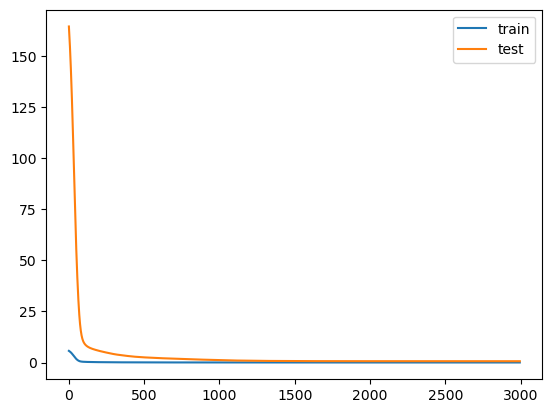

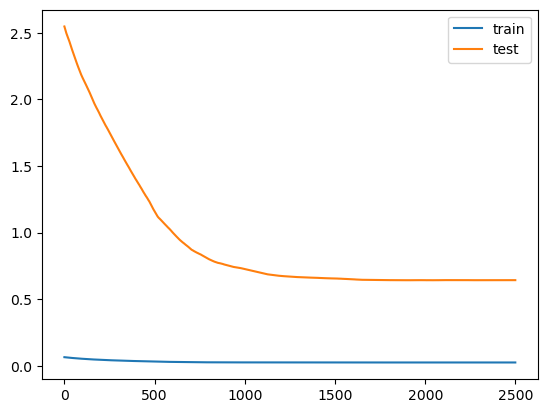

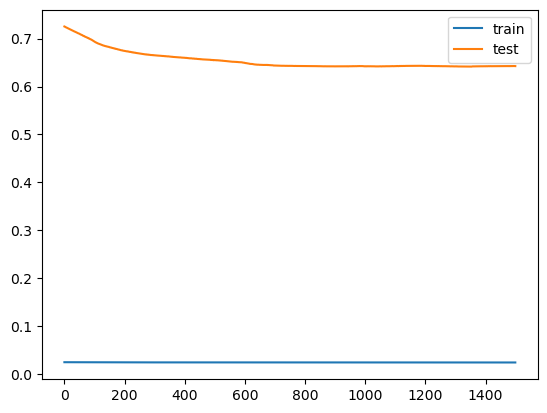

In [23]:
hidden_size = 20
from tqdm import tqdm


# set torch seed to 42
torch.manual_seed(42)


model=MySimpleModel()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)

epochs=3000
lr=0.0001
wd=0.01

import matplotlib.pyplot as plt

train_losses=[]
test_losses=[]
bar=tqdm(range(epochs))
for epoch in bar:
    epoch_loss=0
    for xb, yb in get_batch(X_train,y_train,batch_size=32):
        y_pred=model(xb)
        loss=mse_loss(y_pred, yb)
        loss.backward()
        epoch_loss+=loss.item()
        optimizer.step()
        optimizer.zero_grad()
    test_pred=model(X_test)
    test_loss=mse_loss(test_pred,y_test)
    test_losses.append(test_loss.item())
    train_losses.append(epoch_loss/len(X_train))
    bar.set_postfix(train_loss=train_losses[-1],test_loss=test_losses[-1])


print("train_losses",train_losses[-1])
print("test_losses",test_losses[-1])
plt.plot(train_losses[5:], label='train')
plt.plot(test_losses[5:], label='test')
plt.legend()
plt.show()


plt.plot(train_losses[500:], label='train')
plt.plot(test_losses[500:], label='test')
plt.legend()
plt.show()

plt.plot(train_losses[1500:], label='train')
plt.plot(test_losses[1500:], label='test')
plt.legend()
plt.show()

In [24]:
y_test_pred=model(X_test)

for i in range(15):
    print(y_test_pred[i].item(),y_test[i].item())

12.980498313903809 13.640000343322754
13.051396369934082 14.210000038146973
12.798005104064941 12.930000305175781
13.10743236541748 13.729999542236328
12.938976287841797 12.369999885559082
13.129904747009277 14.300000190734863
12.809503555297852 12.0
12.969880104064941 13.399999618530273
12.742295265197754 11.609999656677246
12.920267105102539 13.359999656677246
12.870542526245117 13.5
13.196440696716309 13.5
13.102538108825684 13.40999984741211
13.017927169799805 12.770000457763672
13.064733505249023 13.630000114440918
